# Случайность в вероятности и на практике

О подходах к понятию случайности: 

Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. 
https://www.mccme.ru/free-books/shen/kolmbook.pdf

А.Н. Ширяев. Случайность в вероятности (доклад на семинаре кафедры теории веротяностей). http://www.mathnet.ru:8080/PresentFiles/21897/bsk_2018_10_17_shiryaev_an_randomness_in_probability_slides.pdf

## Генераторы случайных чисел

Что происходит при вызове, напрмер, ```np.random.rand()```?

Как устроен источник случайной последовательности?

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Рассмотрим простой и популрный алгоритм - Linear congruential generator (LCG). При вызове функции ```rand()``` в C/C++ происзодит обращение именно к LCG.

Linear congruential generator производит последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Число $z_0$ называется *seed* и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG:

In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Выведем несколько первых элементов последовательности:

In [3]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать наобум, это может привести к неожиданным последствиям:

In [4]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Гистограмма распределения похожа на равномерное:

In [5]:
import matplotlib.pyplot as plt
plt.hist(random, normed=True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 1 Axes>

Однако, спектральный тест показывает, что точки располагаются на гиперплоскостях, что плохо согласуется с предствалением о случайности:

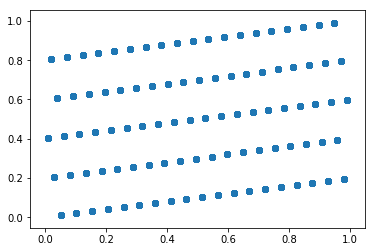

In [6]:
plt.scatter(random[1:], random[:-1])
plt.show()

Более аккуратный выбор параметров приводит с более "случайному" распределению:

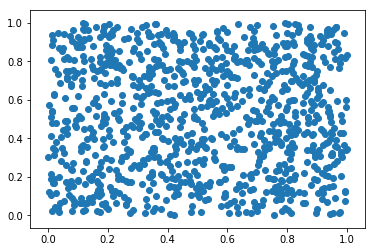

In [7]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Существует набор тестов для проверки "случайности". Например, тесты [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

Больше методов генерации собрано [здесь](https://en.wikipedia.org/wiki/List_of_random_number_generators).

## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


In [8]:
import random
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import math
list_num = [i for i in range(0,9)]
list_weight = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]

weight_tot = sum(list_weight)

def random_distr_wei(list_weight, weight_tot):
    step = 0
    i = 0
    rand_num =  random.uniform(0, weight_tot)

    while i <= 10:
        step += list_weight[i]
        if (step >= rand_num):
            return i
    
        i += 1
    return i


random = [random_distr_wei(list_weight, weight_tot) for i in range(1000)]
print(random[:10])

[1, 4, 9, 1, 9, 1, 3, 2, 5, 4]


### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача
Смделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


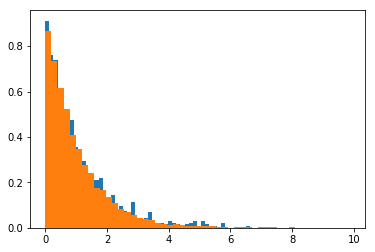

In [9]:
import random
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import math

def my_exp(lmbda=1.0):
    return (-1 / lmbda)*math.log(np.random.rand())

plt.hist([my_exp() for i in range(1000)], 50, density=True)
plt.hist([numpy.random.exponential() for i in range(10000)], 50, normed=True)  
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

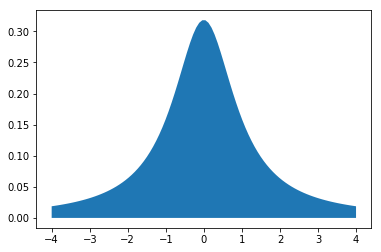

In [10]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

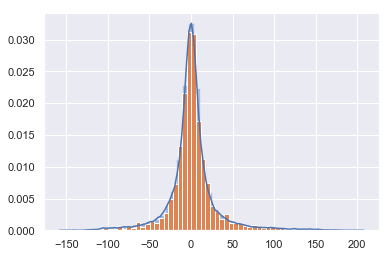

In [11]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def p(x):
    return st.cauchy.pdf(x, loc=0, scale=10) 
def q(x):
    return st.norm.pdf(x, loc=20, scale=40)

x = np.arange(-4, 4)
k = max(p(x) / q(x))

def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(20, 40)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)


if __name__ == '__main__':
     #plt.plot(x, p(x))
     #plt.plot(x, k*q(x))
     #plt.show()

     s = rejection_sampling(iter=100000)
     sns.distplot(s)
plt.hist([rejection_sampling(iter=10000)], 50, density=True)   
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

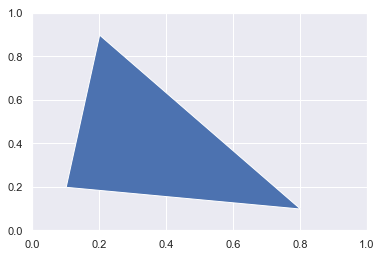

In [12]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

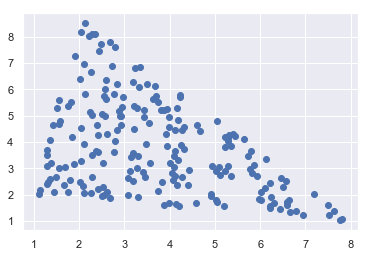

In [13]:
import os
import math
import random
import numpy as np
import matplotlib.pyplot as plt


def trisample(A, B, C, r1, r2):
    s1 = math.sqrt(r1)

    x = A[0] * (1.0 - s1) + B[0] * (1.0 - r2) * s1 + C[0] * r2 * s1
    y = A[1] * (1.0 - s1) + B[1] * (1.0 - r2) * s1 + C[1] * r2 * s1

    return (x, y)

if __name__ == "__main__":
    N = 200

    A = (1.0, 2.0)
    B = (2.0, 9.0)
    C = (8.0, 1.0)

    seed = 1
    xx = list()
    yy = list()
    random.seed(312345)
    for k in range(0, N):

   
        r1 = random.random()
        r2 = random.random()

        pt = trisample(A, B, C, r1, r2)
        xx.append(pt[0])
        yy.append(pt[1])

    plt.scatter(xx,  yy)
    plt.show()

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

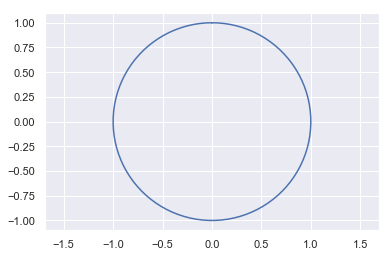

In [14]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

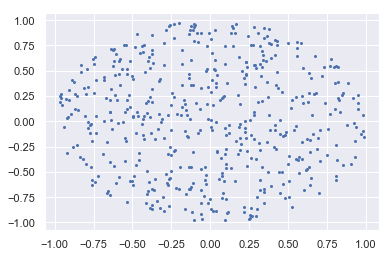

In [15]:
from matplotlib import pyplot as plt
import numpy as np

R = np.sqrt(np.random.uniform(0, 1, 500))
phi = np.random.uniform(0, 2*np.pi, 500)

x = R * np.cos(phi)
y = R * np.sin(phi)
plt.scatter(x, y, s = 4)
plt.show()

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

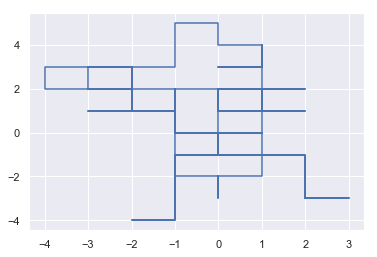

In [16]:
import numpy 
from matplotlib import pyplot as plt
n=100
l = np.random.choice(np.arange(n), n//2, replace=False)
m = np.random.choice(np.arange(n), n//2, replace=False)
l_moves = np.ones(n)
m_moves = np.ones(n)
l_moves[l] = -1
m_moves[m] = -1
l = np.cumsum(l_moves)
m = np.cumsum(m_moves)
x = (m + l)/2
y = (l - m)/2

plt.plot(x, y)
plt.show()

## Random normal generator

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

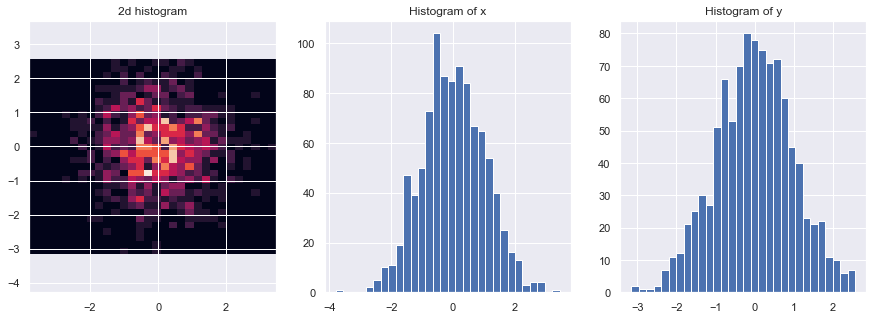

In [17]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

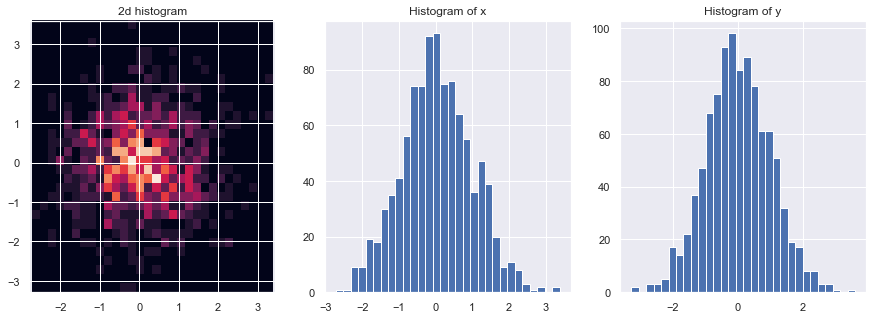

In [18]:
i = 0
cos = []
sin = []
while i<1000:
    u1 = 2*np.random.rand()-1
    u2 = 2*np.random.rand()-1
    t = u1**2+u2**2
    if 0<t<=1:
        cos = np.append(cos, u1)
        sin = np.append(sin, u2)
        i+=1
t = cos**2+sin**2
r = np.sqrt(-2 * np.log(t)/t)
x = r * cos
y = r * sin 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

## Практическое задание

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [29]:
def partition(n):
    b = 0
    sss = 0
    bypart = []
    ran = np.random.rand()
    for k in range(n):
        b+=(k+1)**n/np.math.factorial(k+1)
    b*=1/np.exp(1)
    p = np.array([(k+1)**n/(b*np.math.factorial(k+1)*np.exp(1)) for k in range(100)])
    a_sum = np.cumsum(p)
    
    while True:
        if ran < a_sum[sss]:
            ran = sss+1
            break
        else:
            sss+=1
    
    p = [1/ran for i in range(ran)]
    a_sum = np.cumsum(p)
    rand = [np.random.rand() for i in range(n)]
    for i in range(n):
        sss=0
        while sss!=-1:
            if a_sum[sss]>rand[i]:
                bypart.append(sss)
                sss=-1
            else:
                sss+=1
    return bypart

#LBN
num = 0
for i in range(10000):
    bypart = partition(100)
    num+=len(np.unique(bypart))
print(num/10000)

28.6208
